In [1]:
import os
import sys
import config as cfg
import time
import copy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import itertools


#from fastai.old.fastai.imports import *
#from fastai.old.fastai.structured import *

%matplotlib inline
sns.set()

In [2]:
PROJECT_NAME = 'EconometricsKb'
PROJECT_START_DATE = '28/06/19' #ENGLISH DATE FORMAT
PROJECT_END_DATE = '' #ENGLISH DATE FORMAT

In [3]:
#ROOT, PROJECT_ROOT, PACKAGE_ROOT = config.configure_environment('Local',PROJECT_NAME)

config = cfg.privateConfig(cfg.OS, PROJECT_NAME)

The haribo package provides the following functions to use in Jupyter:

set_screen_width() - sets cells to be 90% of screen width

show_df(dataFrame, allRows = False) - shows all columns of a dataFrame when displayed

pickle_it(data, path) - safely pickles a file

from_pickle_jar(path) - safely loads a pickled file



In [4]:
from UtilityPackagesV2.dbutility import gnrl_database_interaction as gdbi
from UtilityPackagesV2.dbutility import credentials
from UtilityPackagesV2.apiutility import gnrl_api_interaction as gapi
from CodeCandy.haribo import jupyter as candy

# Create a connection object

In [ ]:
logFileName = PROJECT_NAME + '.log'
_ = config.set_logging(logFileName)

newUser = cfg.credentials()

dataIn = {'credentials': newUser,
         'logFileName': 'LogMIQuery.log'}

connection = gdbi.MIConnection(config,credentials=newUser, logFileName=logFileName)
connection = gdbi.GBQConnection(config, credentials=newUser,logFileName=logFileName)
connection2 = gdbi.GBQConnection(config, credentials=newUser,logFileName=logFileName,useLegacy=False, projectId='on-the-beach---attribution',if_exists='replace') # push to BQ
connection = gapi.AdwordsAPIConnection(config, os.path.join(config.PROJECT_ROOT,'Materials', 'googleads.yaml'), credentials=newUser, logFileName = logFileName)
connection = gapi.GaAPIConnection(config, credentials=newUser, logFileName = logFileName)

# Create a connection object handler

In [ ]:
sqlConnection = gdbi.ExecuteSQL(
    connection=connection, 
    query = os.path.join(config.PROJECT_ROOT,'Materials', 'hourlyReportUK.sql'),
    outputPath = os.path.join(config.PROJECT_ROOT,'Data', 'HourlyReportDataMI_29_10_2018.csv')
)

query = {
    'reportRequests': [
    {
      'viewId': '90231540' ,
      'dateRanges': [{'startDate': '7daysAgo', 'endDate': 'today'}],
      'metrics': [{'expression': 'ga:sessions'}],
      'dimensions': [{'name': 'ga:country'}]
    }]}

sqlConnection = gapi.ExecuteAPICall(
    connection=connection, 
    query=query,
    outputPath=os.path.join(config.PROJECT_ROOT,'Data', 'GA_API_data.csv')
)

# Pull data

In [ ]:
message, data = sqlConnection.execute_script()
data

# Import data from CSV

In [5]:
dfRaw = pd.read_csv(
    os.path.join(config.PROJECT_ROOT, 'Materials', 'raw.csv'),
    parse_dates=['Date', 'ClassTime'],
    dayfirst=True,
    index_col='Date', 
    dtype={
        'AcademicYear':np.int32,
        'Week': np.int32,
        'HeadCount': np.int32,
        'PaidCount': np.int32,
    }
)

dfRaw['year'] = [d.year for d in dfRaw.index]
dfRaw['month'] = [d.strftime('%b') for d in dfRaw.index]

In [6]:
candy.show_df(dfRaw.iloc[200:300])

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social
Date,,,,,,,,,
2015-03-10,2014,19,37,37,144.3,6pm,Sugden,NaN,NaN
2015-03-12,2014,19,29,29,113.1,7pm,Trinity,NaN,NaN
2015-03-17,2014,20,41,41,159.9,6pm,Sugden,NaN,NaN
2015-03-19,2014,20,23,23,89.7,7pm,Trinity,Grading,NaN
2015-04-14,2014,21,33,33,128.7,6pm,Sugden,First Class,NaN
2015-04-16,2014,21,5,5,19.5,7pm,Trinity,NaN,NaN
2015-04-21,2014,22,22,22,85.8,6pm,Sugden,NaN,NaN
2015-04-23,2014,22,21,21,81.9,6pm,Trinity,Time Change,NaN
2015-04-28,2014,23,25,25,97.5,6pm,Sugden,NaN,NaN


(100, 9)


# Time Series EDA

## Plot time series

Text(0, 0.5, 'Number of Students')

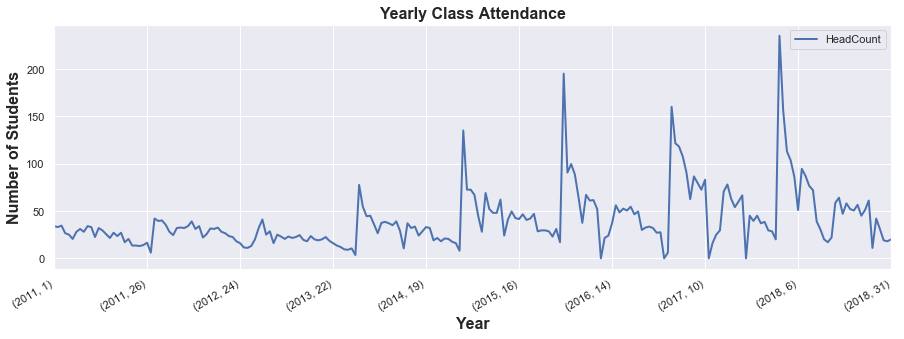

In [7]:
dfRaw[dfRaw['Event']!='No Class'][['AcademicYear','Week','HeadCount']].groupby(by=['AcademicYear','Week']).mean().plot(figsize=(15,5),linewidth=2,subplots=True)
plt.title('Yearly Class Attendance',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')

## Fill in the missing dates between classes

Text(0, 0.5, 'Number of Students')

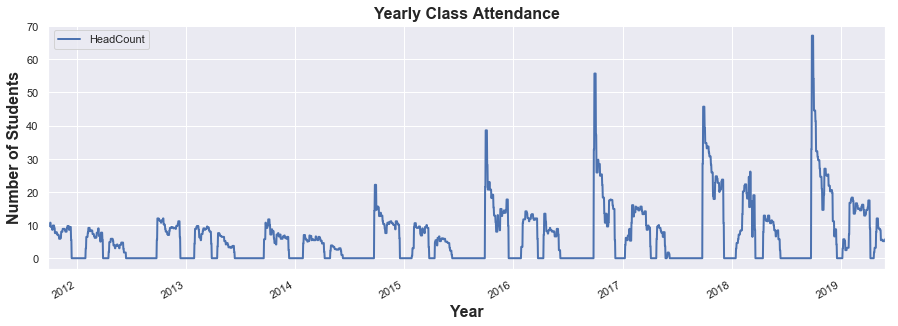

In [8]:
idx = pd.date_range(dfRaw.index.min(), dfRaw.index.max())
dfRaw.reindex(idx,fill_value=0)[['HeadCount']].rolling(window=7).mean().plot(figsize=(15,5),linewidth=2,subplots=True)
plt.title('Yearly Class Attendance',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')

## Look at the year on year seasonal patterns

Is the club growing or stagnating

Text(0, 0.5, 'Student number')

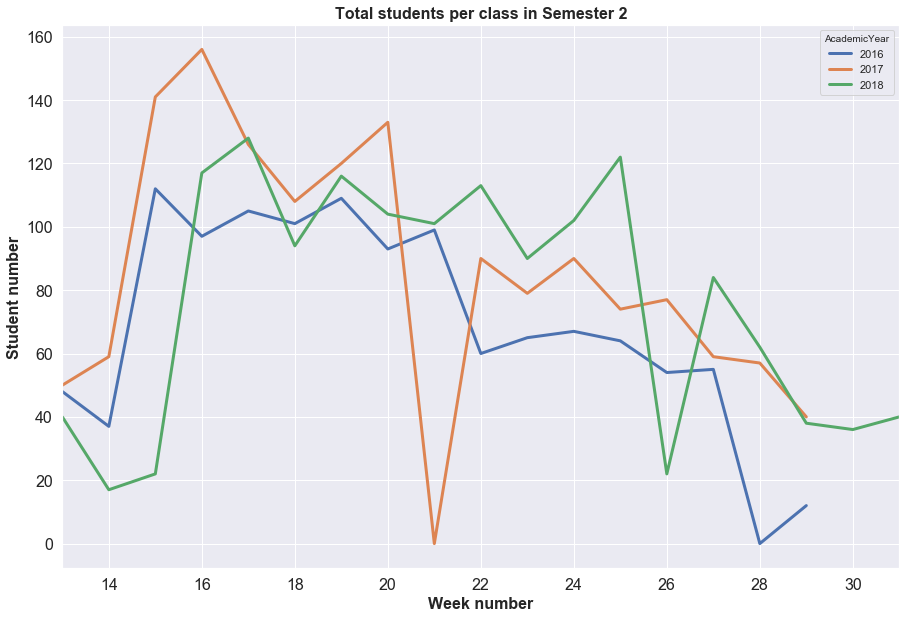

In [9]:
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>2015) & (dfRaw['Week'] >12)], index='Week', columns='AcademicYear',
                    values='HeadCount', aggfunc='sum').plot(figsize=(15,10),fontsize=16, linewidth = 3)

plt.title('Total students per class in Semester 2',fontsize=16,fontweight='bold')
plt.xlabel('Week number',fontsize=16,fontweight='bold')
plt.ylabel('Student number',fontsize=16,fontweight='bold')

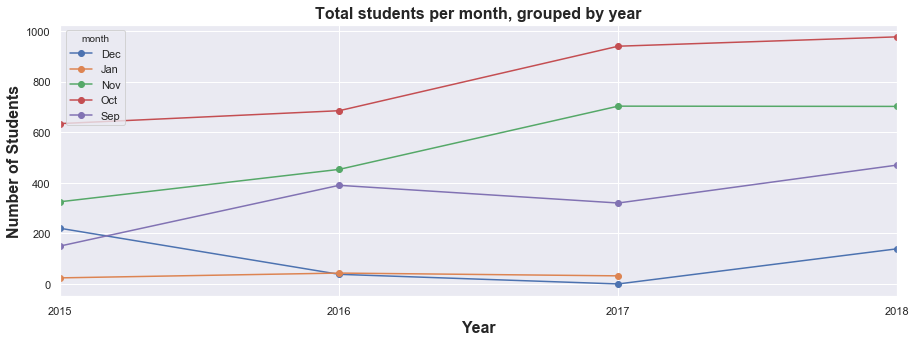

In [79]:
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>=2015) & (dfRaw['Week'] >=1) & (dfRaw['Week'] <=12)], index='AcademicYear', columns='month',
                    values='HeadCount', aggfunc='sum').plot(marker='o',figsize=(15,5))
'''
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>=2015) & (dfRaw['Week'] >=1) & (dfRaw['Week'] <=12)], index='AcademicYear', columns='month',
                    values='HeadCount', aggfunc='sum').plot(figsize=(15,5))

'''

plt.title('Total students per month, grouped by year',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')
plt.xticks([2015,2016,2017,2018]);

In [65]:
dfRaw.head()

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social,year,month
Date,,,,,,,,,,,
2011-09-27,2011,1,26,0,0.0,6pm,Sugden,First Class,NaN,2011,Sep
2011-09-29,2011,1,42,0,0.0,6.30pm,Sugden,NaN,NaN,2011,Sep
2011-10-04,2011,2,33,33,128.7,6pm,Sugden,NaN,NaN,2011,Oct
2011-10-06,2011,2,33,33,128.7,6.30pm,Sugden,NaN,NaN,2011,Oct
2011-10-11,2011,3,27,27,105.3,6pm,Sugden,NaN,NaN,2011,Oct


In [11]:
list(dfRaw.columns)

['AcademicYear',
 'Week',
 'HeadCount',
 'PaidCount',
 'CashTaken',
 'ClassTime',
 'Venue',
 'Event',
 'Social']

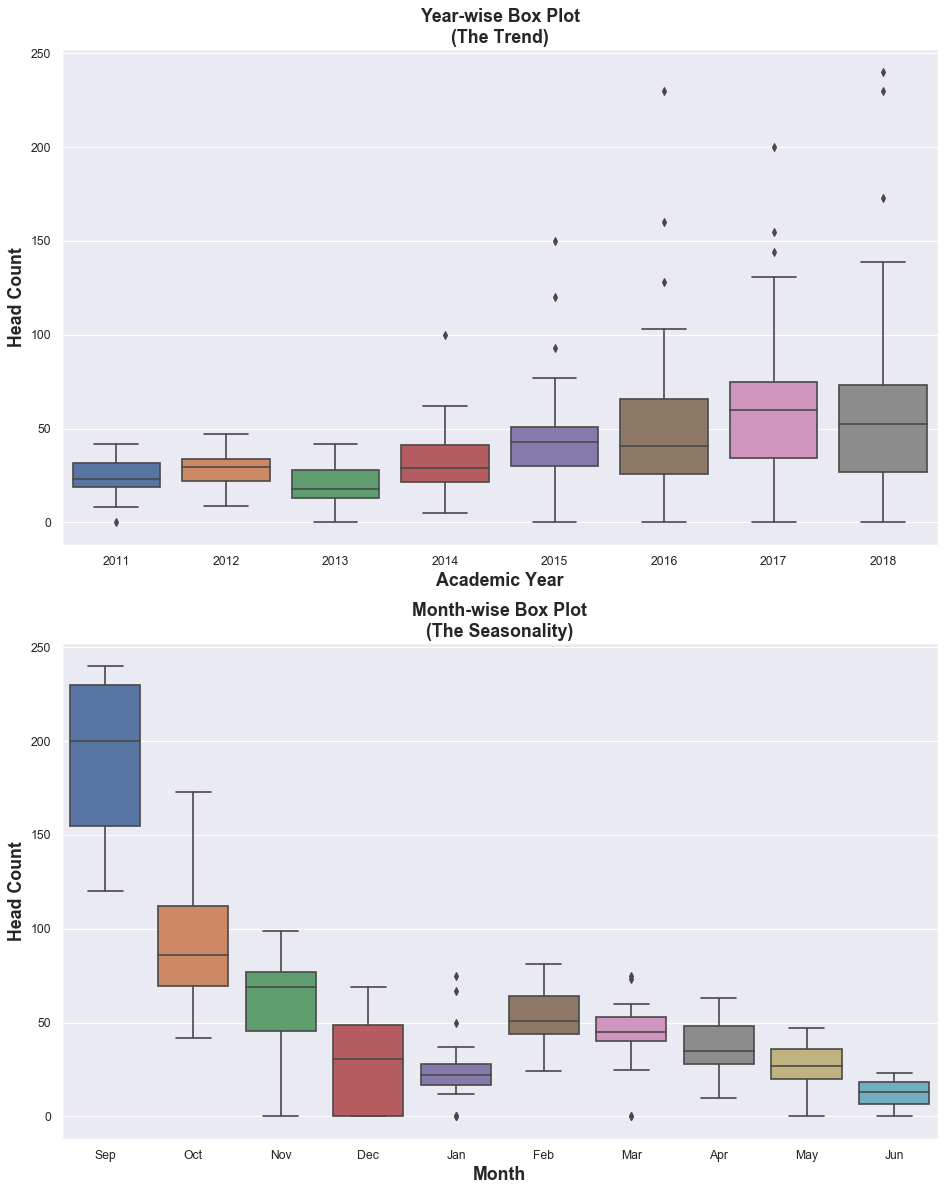

In [54]:
# Prepare data

years = dfRaw['year'].unique()

# Draw Plot
fig, axes = plt.subplots(2, 1, figsize=(12,15), dpi= 80)
sns.boxplot(x='AcademicYear', y='HeadCount', data=dfRaw, ax=axes[0])
sns.boxplot(x='month', y='HeadCount', data=dfRaw[dfRaw['AcademicYear']>=2015])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=16, fontweight='bold'); 
axes[0].set_xlabel('Academic Year', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Head Count', fontsize=16, fontweight='bold')

axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Head Count', fontsize=16, fontweight='bold')

plt.tight_layout()

Text(0, 0.5, 'Total number of students')

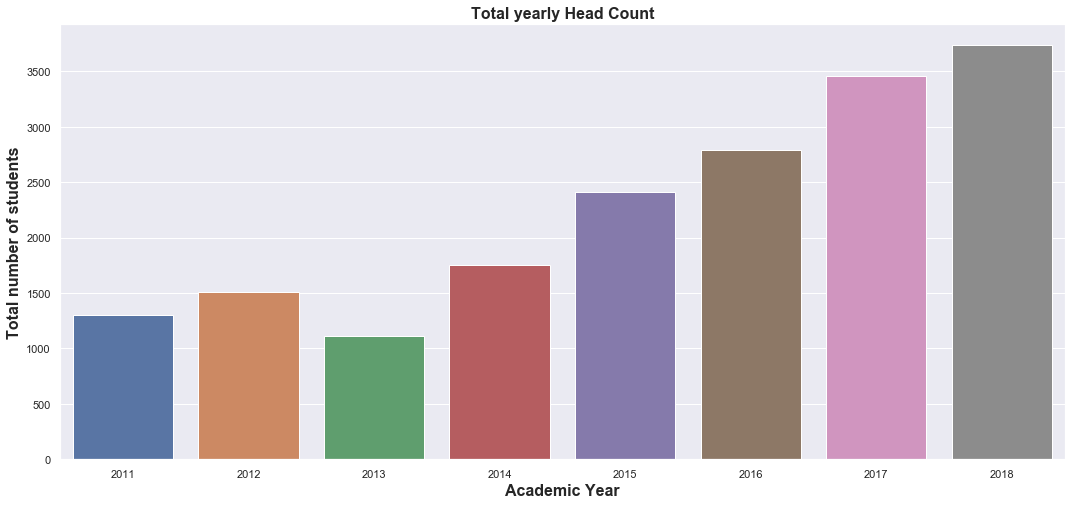

In [53]:
#dfRaw[['AcademicYear','HeadCount']].groupby('AcademicYear').sum().plot(kind='bar',figsize = (10,5))
sns.barplot(data = dfRaw[['AcademicYear','HeadCount']].groupby('AcademicYear',as_index=False).sum(),x='AcademicYear',y='HeadCount')
plt.title('Total yearly Head Count',fontsize=16,fontweight='bold')
plt.xlabel('Academic Year',fontsize=16,fontweight='bold')
plt.ylabel('Total number of students',fontsize=16,fontweight='bold')

# ARIMA Modelling

## Prepare the data

In [82]:
dfARIMA = copy.deepcopy(dfRaw)
dfARIMA=dfARIMA.reindex(idx,fill_value=0)[['HeadCount']].resample('W').sum().fillna(0)#.rolling(window=7).mean().resample('W').mean().fillna(0)

In [83]:
'''
cols = ['AcademicYear', 'Week', 'PaidCount', 'CashTaken',
       'ClassTime', 'Venue', 'Event', 'Social']
dfARIMA.drop(cols,axis=1, inplace=True)
'''

"\ncols = ['AcademicYear', 'Week', 'PaidCount', 'CashTaken',\n       'ClassTime', 'Venue', 'Event', 'Social']\ndfARIMA.drop(cols,axis=1, inplace=True)\n"

In [84]:
dfARIMA.isnull().sum()

HeadCount    0
dtype: int64

In [85]:
candy.show_df(dfARIMA.head())

,HeadCount
2011-10-02,68
2011-10-09,66
2011-10-16,69
2011-10-23,53
2011-10-30,50


(5, 1)


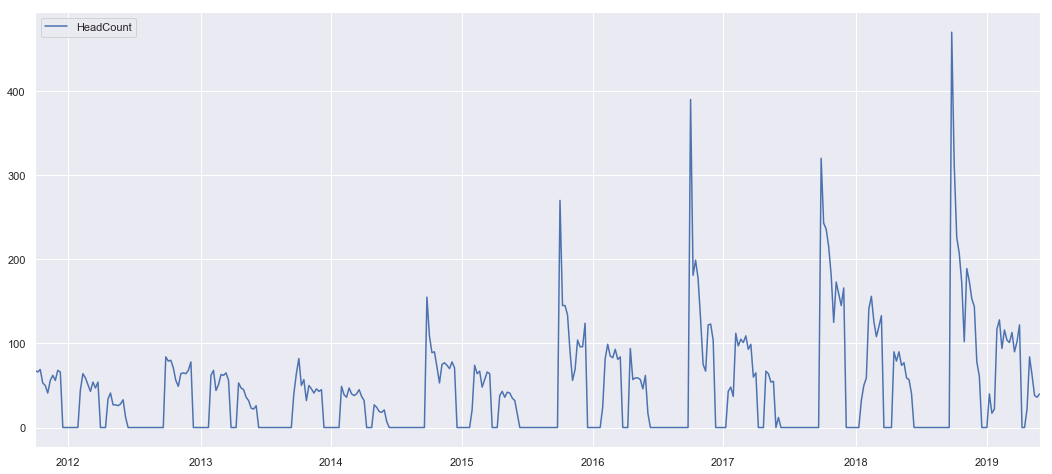

In [86]:
dfARIMA.plot()

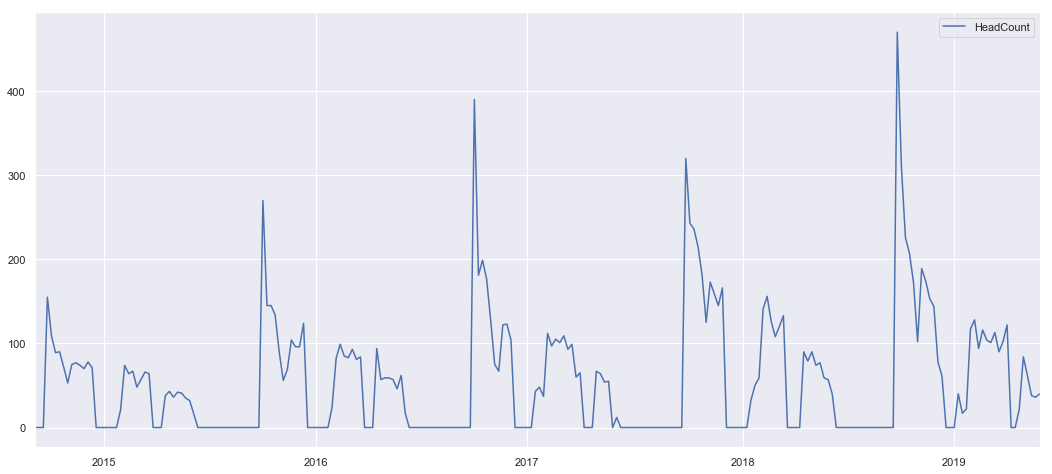

In [98]:
y = dfARIMA[dfARIMA.index >='2014-09-01']
y.plot(figsize = (18,8))

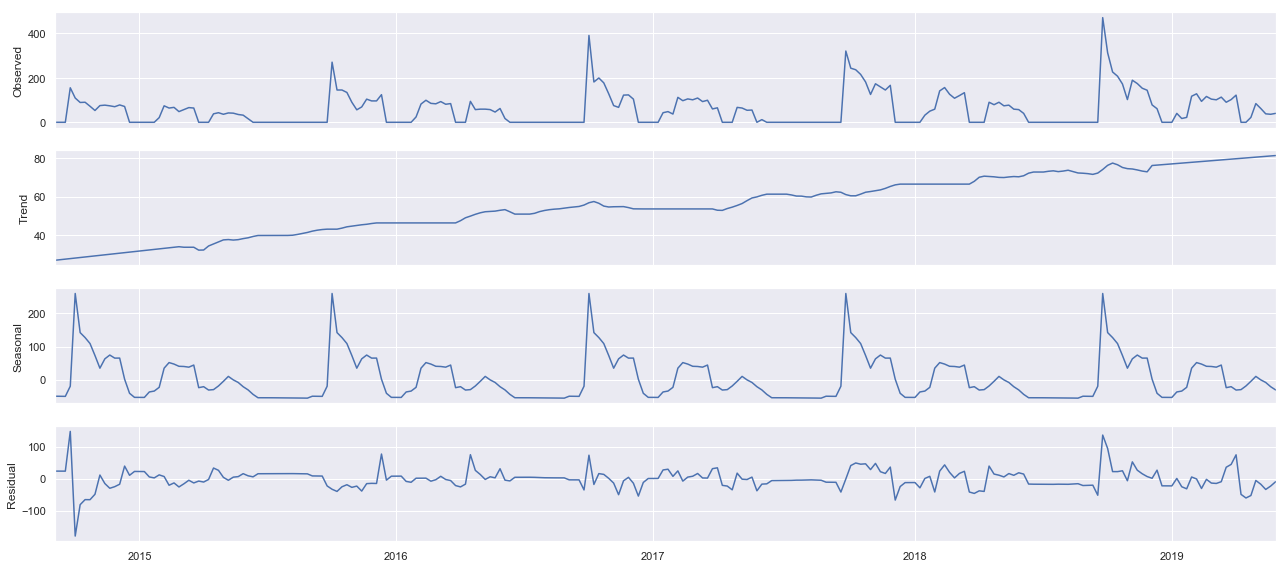

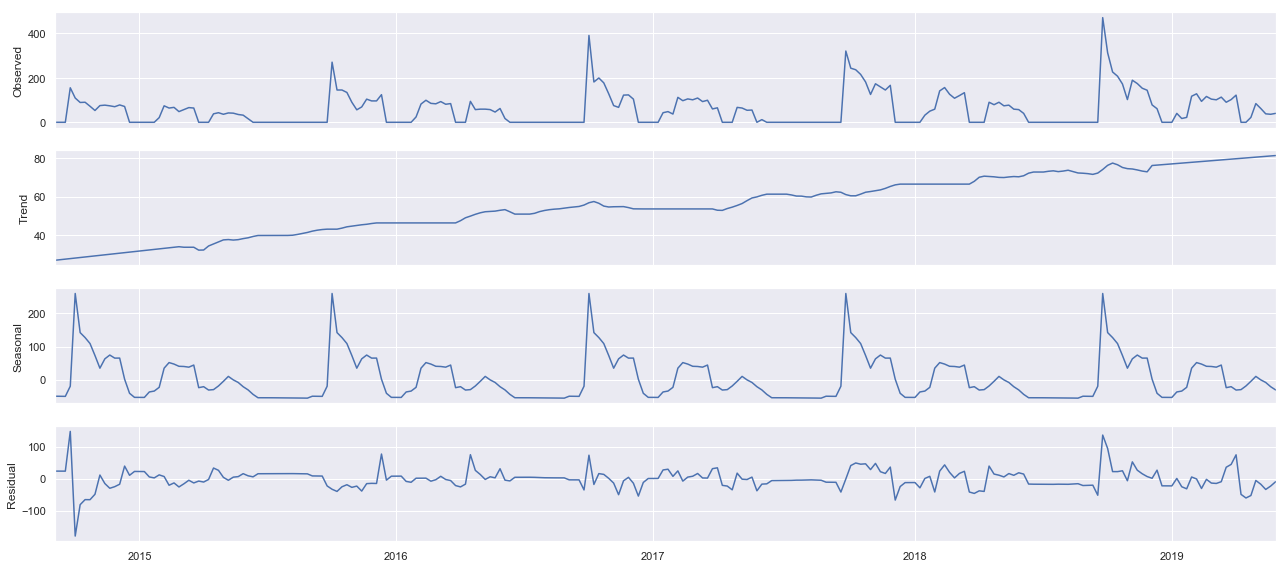

In [238]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
decomposition.plot()

## Test for stationarity

In [100]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(y.HeadCount, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(y.HeadCount, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.217651213707578
p-value: 2.1521273554144935e-10
Critial Values:
   1%, -3.457105309726321
Critial Values:
   5%, -2.873313676101283
Critial Values:
   10%, -2.5730443824681606

KPSS Statistic: 0.272732
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/anaconda3/envs/utilityPackages/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [33]:
??plot_acf

## Calculate differencing required (d term)

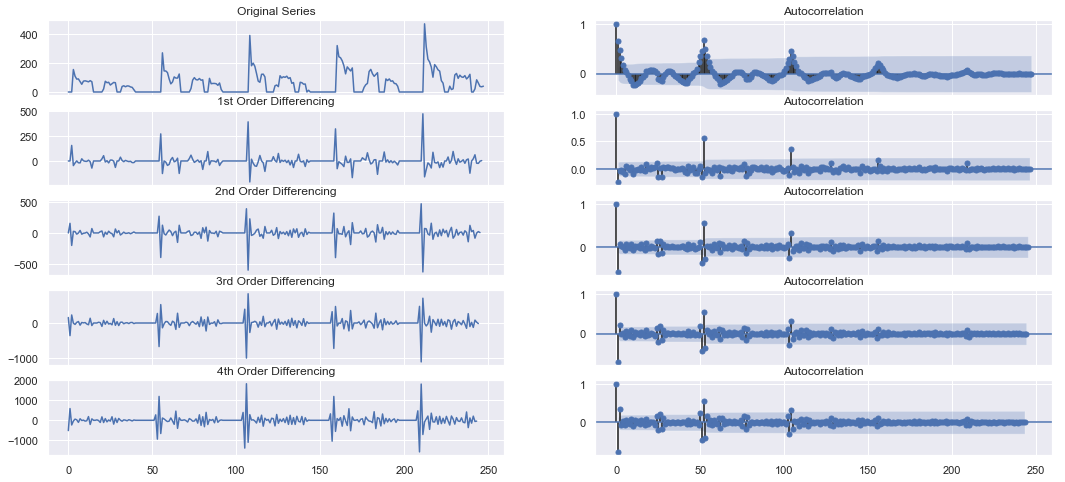

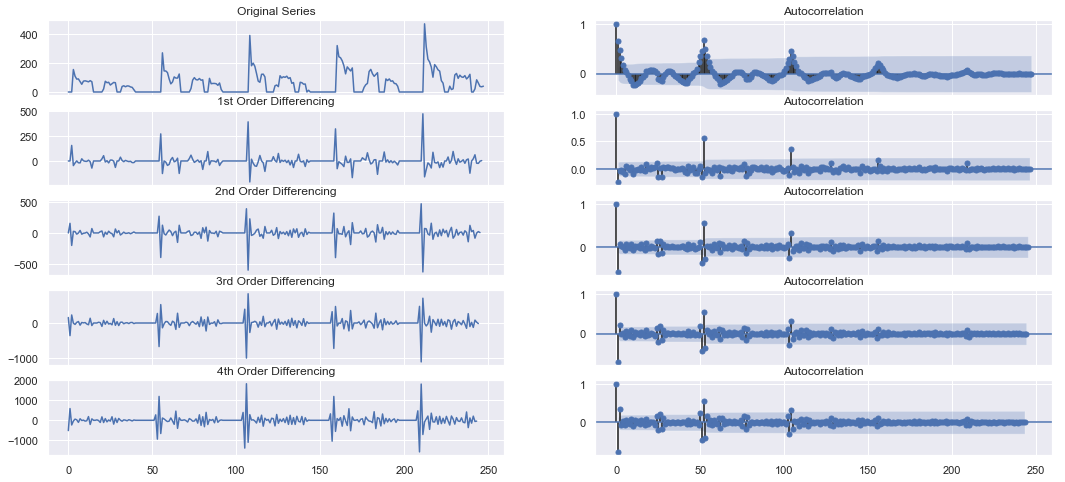

In [101]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(5, 2, sharex=True)
axes[0, 0].plot(y.HeadCount.values); axes[0, 0].set_title('Original Series')
plot_acf(y.HeadCount, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.HeadCount.diff().dropna().values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.HeadCount.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.HeadCount.diff().diff().dropna().values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.HeadCount.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(y.HeadCount.diff().diff().diff().dropna().values); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(y.HeadCount.diff().diff().diff().dropna(), ax=axes[3, 1])

# 4th Differencing
axes[4, 0].plot(y.HeadCount.diff().diff().diff().diff().dropna().values); axes[4, 0].set_title('4th Order Differencing')
plot_acf(y.HeadCount.diff().diff().diff().diff().dropna(), ax=axes[4, 1])





In [246]:
result = adfuller(y.HeadCount.diff().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(y.HeadCount.diff().dropna().values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.475523502364865
p-value: 3.9993152613884e-16
Critial Values:
   1%, -3.457664132155201
Critial Values:
   5%, -2.8735585105960224
Critial Values:
   10%, -2.5731749894132916

KPSS Statistic: 0.040221
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/anaconda3/envs/utilityPackages/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Calcultaing the AR term (p)

AttributeError: 'AxesSubplot' object has no attribute 'x_lim'

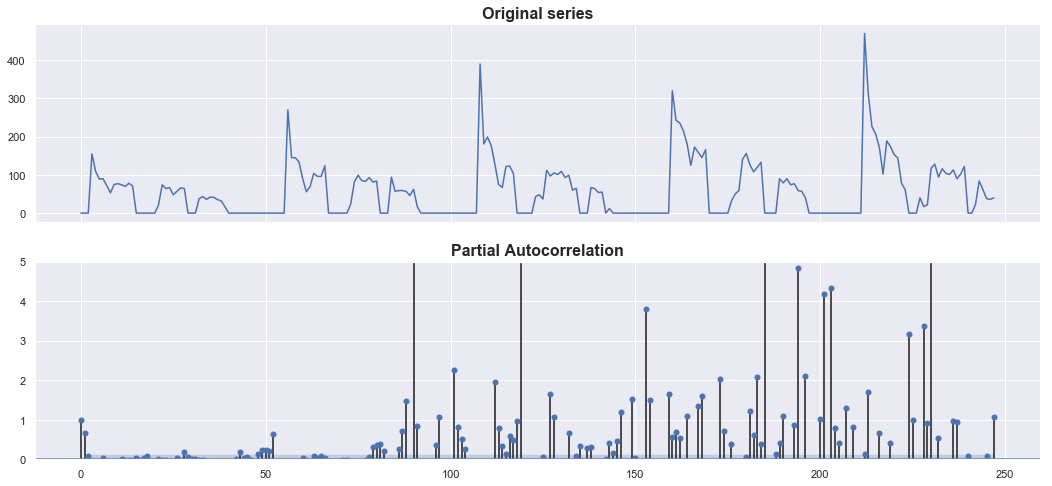

In [323]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(y.HeadCount.dropna().values); axes[0].set_title('Original series',fontsize=16,fontweight='bold')
axes[1].set(ylim=(0,5))
plot_pacf(y.HeadCount.dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation',fontsize=16,fontweight='bold')
axes[1].x_lim([0, 25])

p term of 0 or 1

## Calculating the MA term (q)

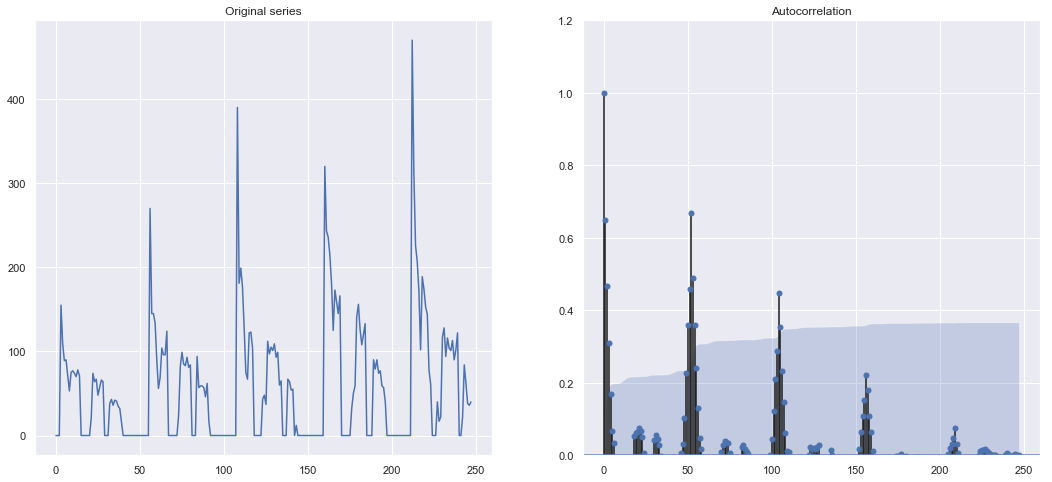

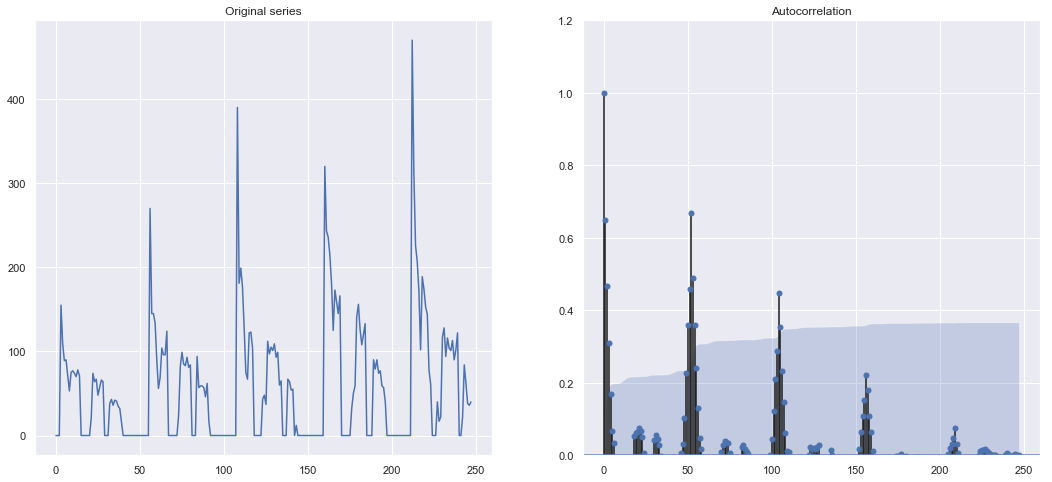

In [273]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y.HeadCount.dropna().values); axes[0].set_title('Original series')
axes[1].set(ylim=(0,1.2))
plot_acf(y.HeadCount.dropna().dropna(), ax=axes[1])

q term of 3

## Fit a model using the calculated terms

In [158]:
mod = sm.tsa.statespace.SARIMAX(y[y.index <='2018-10-21'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6560      0.099      6.598      0.000       0.461       0.851
ma.L1         -1.0000    284.826     -0.004      0.997    -559.248     557.248
ar.S.L12      -0.0396      0.100     -0.398      0.691      -0.235       0.155
ma.S.L12      -1.0000    284.781     -0.004      0.997    -559.160     557.160
sigma2      3300.0814      0.069   4.75e+04      0.000    3299.945    3300.218


In [257]:
mod = sm.tsa.statespace.SARIMAX(y[y.index <='2018-10-21'],
                                order=(0, 2, 3),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
print(results.aic)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2488      0.272     -4.584      0.000      -1.783      -0.715
ma.L2          0.0943      0.193      0.488      0.625      -0.284       0.473
ma.L3          0.1473      0.157      0.941      0.347      -0.160       0.454
ar.S.L12      -0.0044      0.059     -0.075      0.940      -0.120       0.112
ma.S.L12      -0.9659      0.409     -2.360      0.018      -1.768      -0.164
sigma2      3884.0327   1580.367      2.458      0.014     786.570    6981.496
2102.2702504514546


/anaconda3/envs/utilityPackages/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


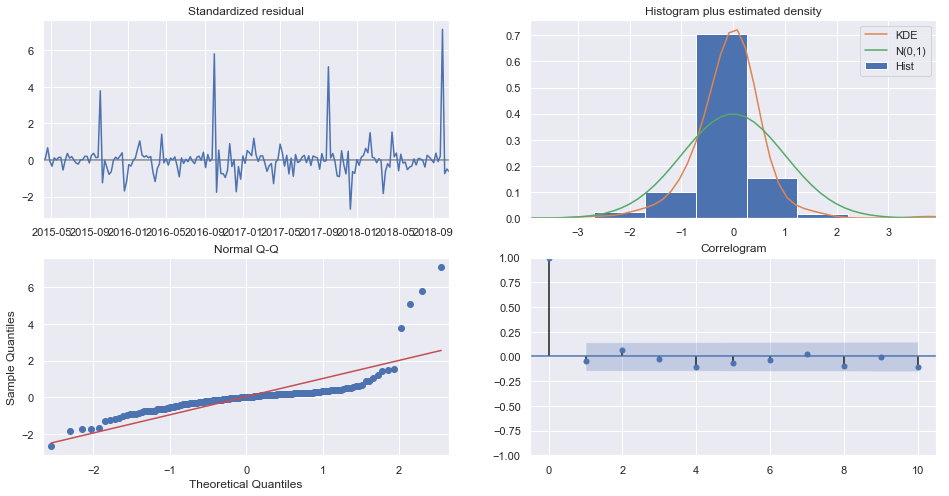

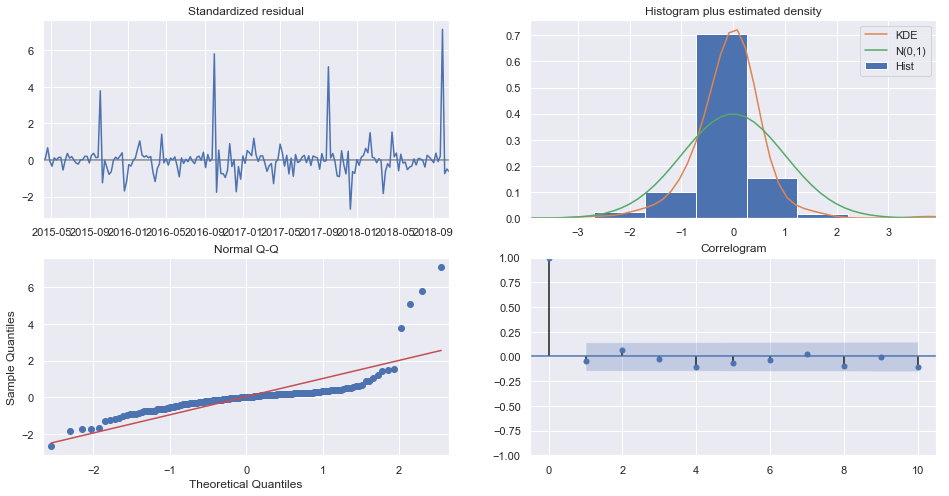

In [258]:
results.plot_diagnostics(figsize=(16, 8))

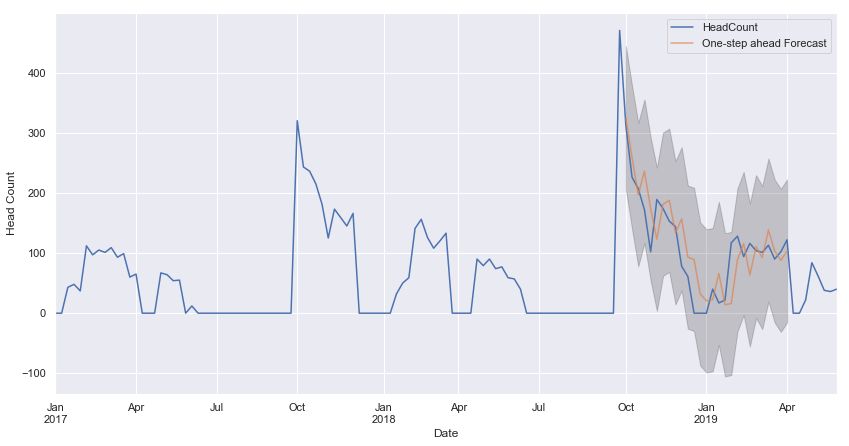

In [274]:
pred = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Head Count')
plt.legend()


In [275]:
y_forecasted = pred.predicted_mean.values
y_truth = y['2018-10-07':].values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 11662.31


In [276]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 107.99


In [277]:
from datetime import datetime  
from datetime import timedelta 

startdate = pd.to_datetime('2018-10-07')
predictions = pd.DataFrame()

for week in range(0,28):
    date = startdate +timedelta(weeks=week)
    
    mod = sm.tsa.statespace.SARIMAX(y[y.index <date],
                                order=(0, 1, 3),
                                #seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    predictions = pd.concat([predictions, pd.DataFrame(results.forecast(steps=1))])


/anaconda3/envs/utilityPackages/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/envs/utilityPackages/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


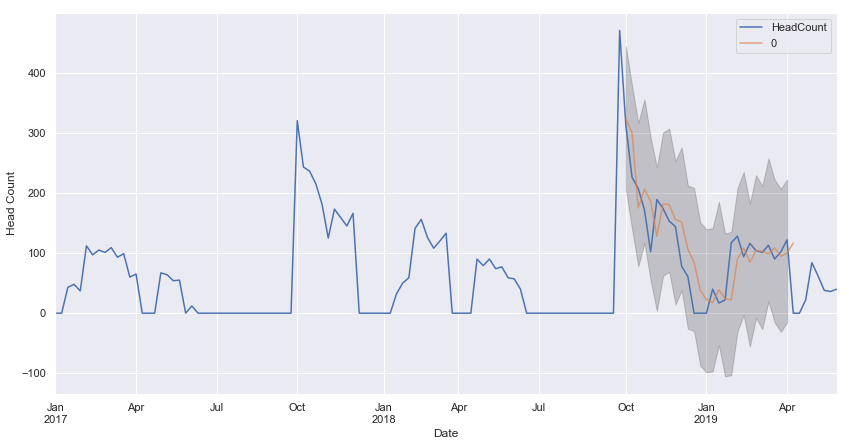

In [278]:
ax = y['2017':].plot(label='observed')
predictions.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Head Count')
plt.legend()

In [279]:
y_forecasted = predictions.values
y_truth = y['2018-10-07':predictions.index.max()].values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2266.26


In [280]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 47.61


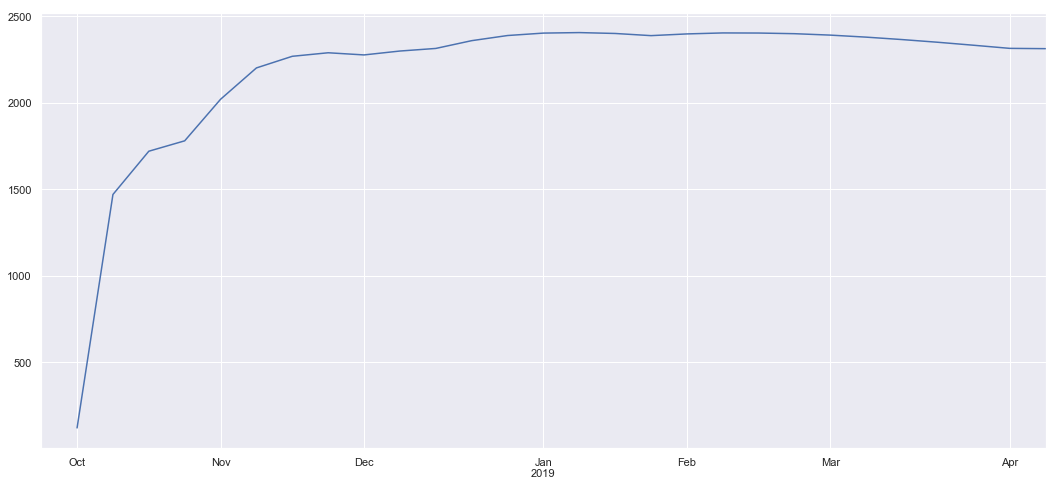

In [285]:
outputs = pd.DataFrame(pd.concat([predictions,y['2018-09-30':predictions.index.max()]],axis=1))
outputs.rename(columns={0:'Forecasted'},inplace=True)
outputs['Square Error'] = (outputs['Forecasted']-outputs['HeadCount'])**2
outputs['mse'] = outputs['Square Error'].expanding().mean()
outputs['RMSE'] = outputs['mse'].expanding().mean()
outputs['difference'] = (outputs['HeadCount']-outputs['Forecasted'])/outputs['HeadCount']*100
outputs['RMSE'].plot()

In [286]:
outputs

,Forecasted,HeadCount,Square Error,mse,RMSE,difference
2018-09-30,NaN,470,NaN,NaN,NaN,NaN
2018-10-07,322.933812,312,119.548240,119.548240,119.548240,-3.504427
2018-10-14,300.286655,226,5518.507178,2819.027709,1469.287974,-32.870202
2018-10-21,175.046190,207,1021.045973,2219.700463,1719.425471,15.436623
2018-10-28,206.350920,172,1179.985735,1959.771781,1779.512048,-19.971465
2018-11-04,186.046960,102,7063.891569,2980.595739,2019.728786,-82.398981
2018-11-11,127.832441,189,3741.470263,3107.408160,2201.008682,32.363788
2018-11-18,181.639256,174,58.358234,2671.829599,2268.268813,-4.390377
2018-11-25,180.329592,153,746.906583,2431.214222,2288.636989,-17.862478
2018-12-02,155.782352,144,138.823820,2176.504177,2276.177788,-8.182189


In [311]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(y.HeadCount, order=(1,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.HeadCount   No. Observations:                  246
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1343.192
Method:                       css-mle   S.D. of innovations             55.158
Date:                Fri, 12 Jul 2019   AIC                           2696.384
Time:                        11:07:21   BIC                           2713.910
Sample:                    09-21-2014   HQIC                          2703.441
                         - 06-02-2019                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0003      0.004      0.067      0.947      -0.008       0.009
ar.L1.D2.HeadCount     0.6524      0.050     12.954      0.000       0.554       0.751
ma.L1.D2.HeadCount  

/anaconda3/envs/utilityPackages/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


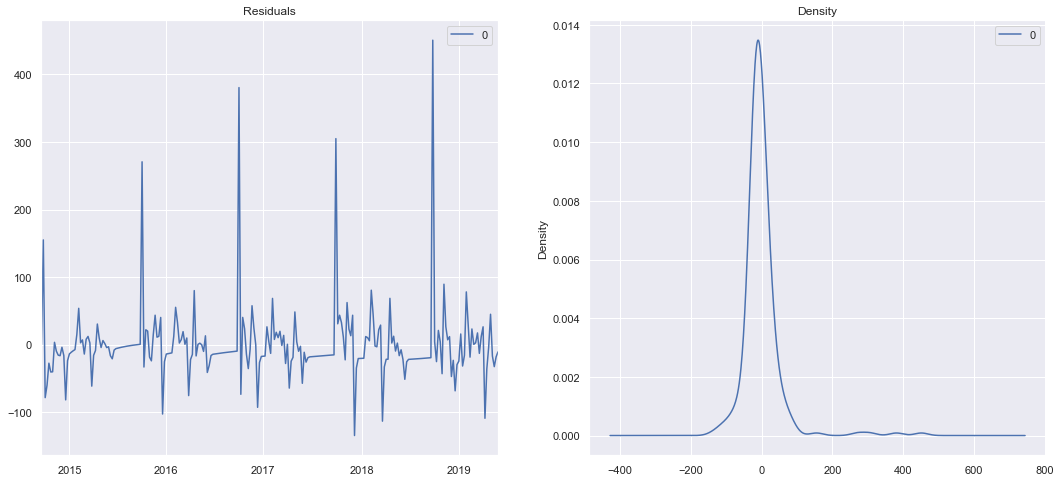

In [300]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

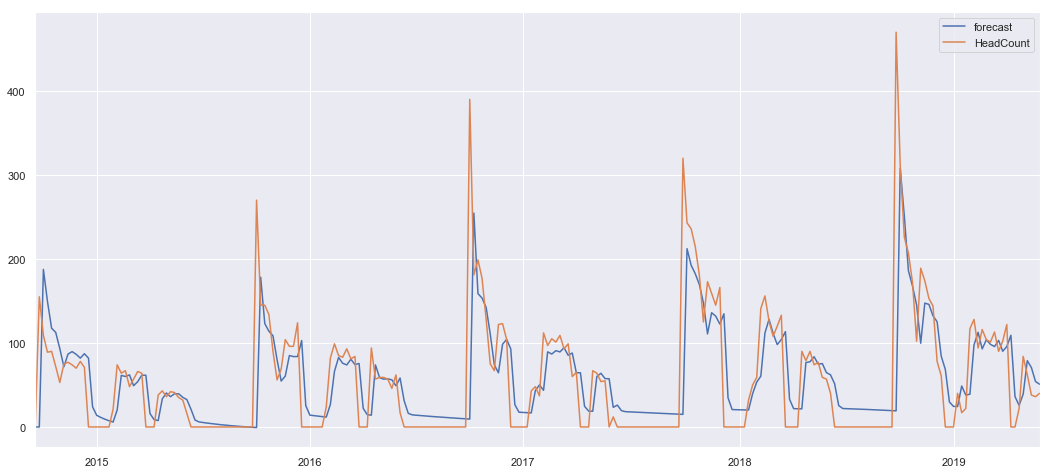

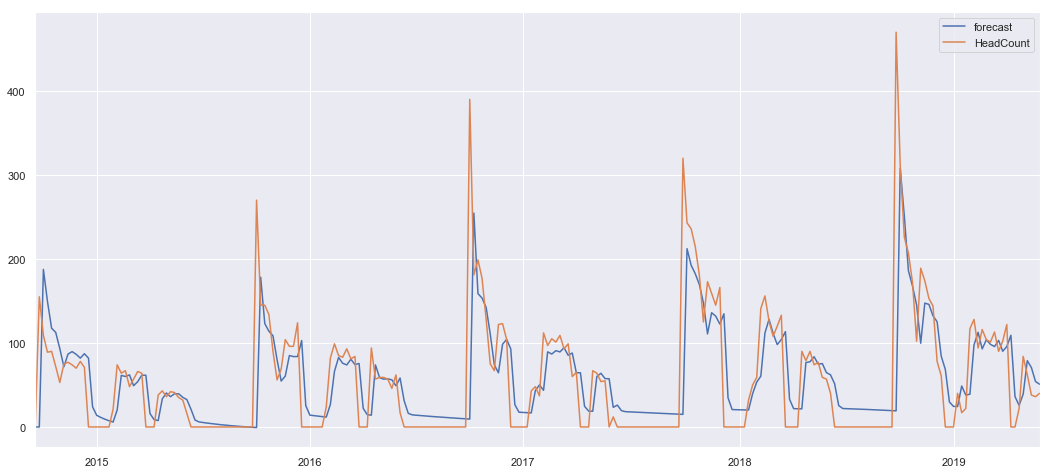

In [301]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)